# 01. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# 02. Importing data

In [4]:
path = r'/Users/user/Documents/Data analysis/E6 Dashboards/Data'

In [6]:
datalis = pd.read_csv(os.path.join(path, 'Cleaned data', 'listings_rev.csv'))

# 03. Selecting variables

In [10]:
datalis.head()

,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2818,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2.10,1,44
1,1,3209,3806,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,1.03,1,47
2,2,20168,59484,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2.18,2,198
3,3,25428,56142,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,0.09,2,141
4,4,27886,97647,Centrum-West,52.386727,4.892078,Private room,150,2,171,2.03,1,199


In [12]:
df = datalis.drop(columns = ['Unnamed: 0', 'id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'reviews_per_month', 'room_type'])

In [16]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,59,3,248,1,44
1,160,4,42,1,47
2,80,1,233,2,198
3,125,14,1,2,141
4,150,2,171,1,199


In [18]:
# Data standardisation
stand = df.apply(lambda x: (x - x.mean()) / x.std())
print(stand)

          price  minimum_nights  number_of_reviews  \
0     -0.638976       -0.026218           5.236772   
1      0.053616        0.053543           0.472697   
2     -0.494971       -0.185741           4.889873   
3     -0.186391        0.851156          -0.475493   
4     -0.014957       -0.105979           3.456025   
...         ...             ...                ...   
20025  1.287939        0.292827          -0.498620   
20026 -0.014957       -0.026218          -0.498620   
20027 -0.494971        0.532111          -0.498620   
20028 -0.666405       -0.105979          -0.498620   
20029  0.465057        0.133304          -0.498620   

       calculated_host_listings_count  availability_365  
0                           -0.162932         -0.152975  
1                           -0.162932         -0.124137  
2                           -0.119305          1.327399  
3                           -0.119305          0.779468  
4                           -0.162932          1.337012  
...

# 04. Elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

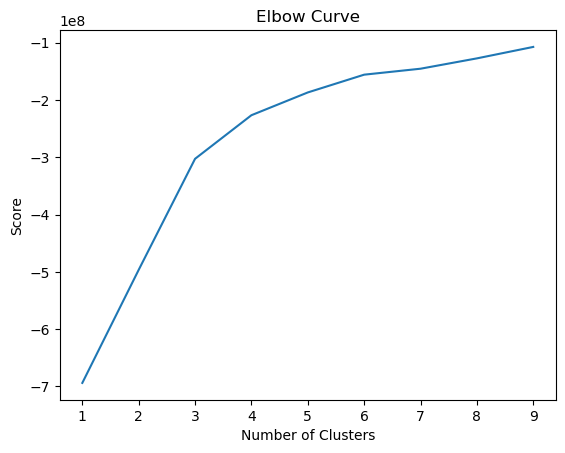

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [27]:
#Checking for standardised data
score_stand = [kmeans[i].fit(stand).score(stand) for i in range(len(kmeans))]

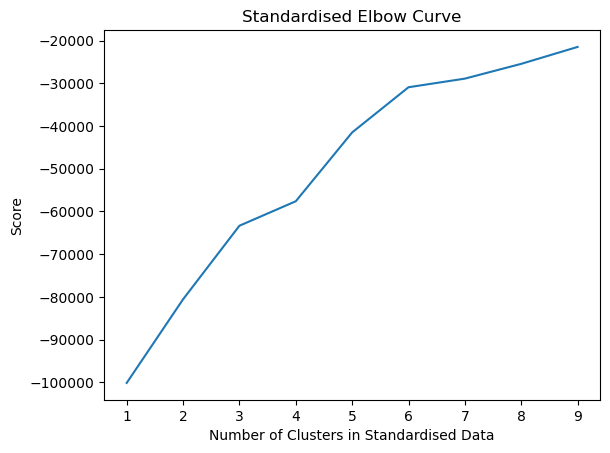

In [29]:
pl.plot(num_cl,score_stand)
pl.xlabel('Number of Clusters in Standardised Data')
pl.ylabel('Score')
pl.title('Standardised Elbow Curve')
pl.show()

Both 3 and 6 clusters are good options here, but 6 might be too much to conceptualise, so I'll start with 3.

# 05. K-means algorithm

In [35]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [37]:
# Create the second (expanded) k-means object.

kmeans_exp = KMeans(n_clusters = 6)

In [39]:
kmeans.fit(stand)

KMeans(n_clusters=3)

In [41]:
kmeans_exp.fit(stand)

KMeans(n_clusters=6)

# 06. New columns with cluster data

In [44]:
df['clusters'] = kmeans.fit_predict(df)
df['clusters_exp'] = kmeans_exp.fit_predict(df)

In [46]:
df.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters,clusters_exp
0,59,3,248,1,44,0,4
1,160,4,42,1,47,0,4
2,80,1,233,2,198,1,1
3,125,14,1,2,141,0,4
4,150,2,171,1,199,1,1


# 07. Visualizations

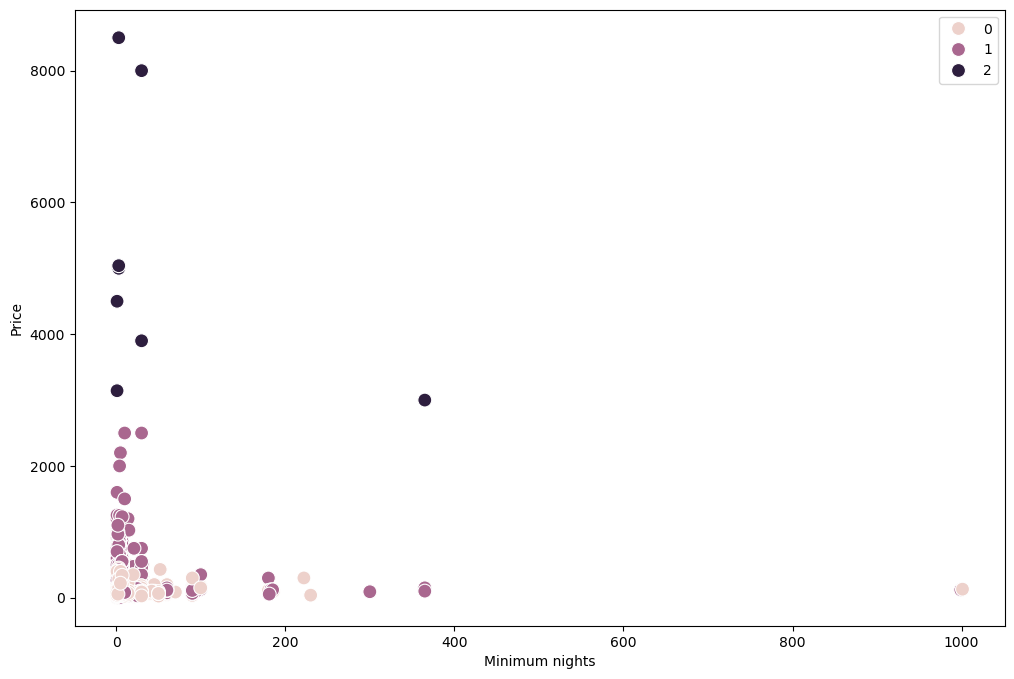

In [50]:
# Plot 3 clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Minimum nights')
plt.ylabel('Price')
plt.show()

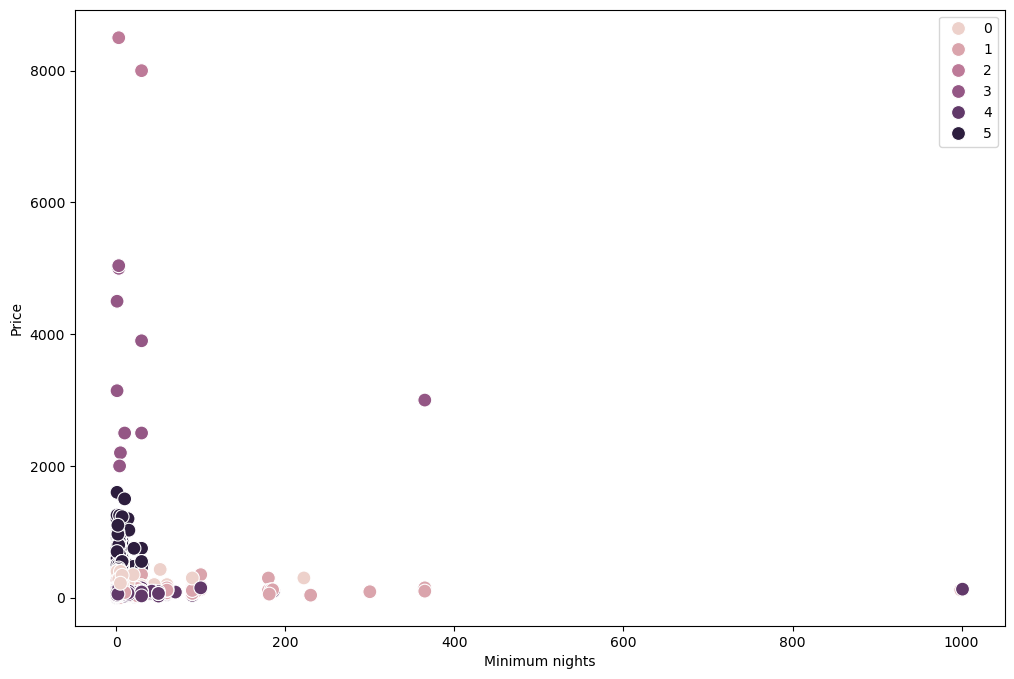

In [52]:
# Plot 6 clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=kmeans_exp.labels_, s=100) 
ax.grid(False)
plt.xlabel('Minimum nights')
plt.ylabel('Price')
plt.show()

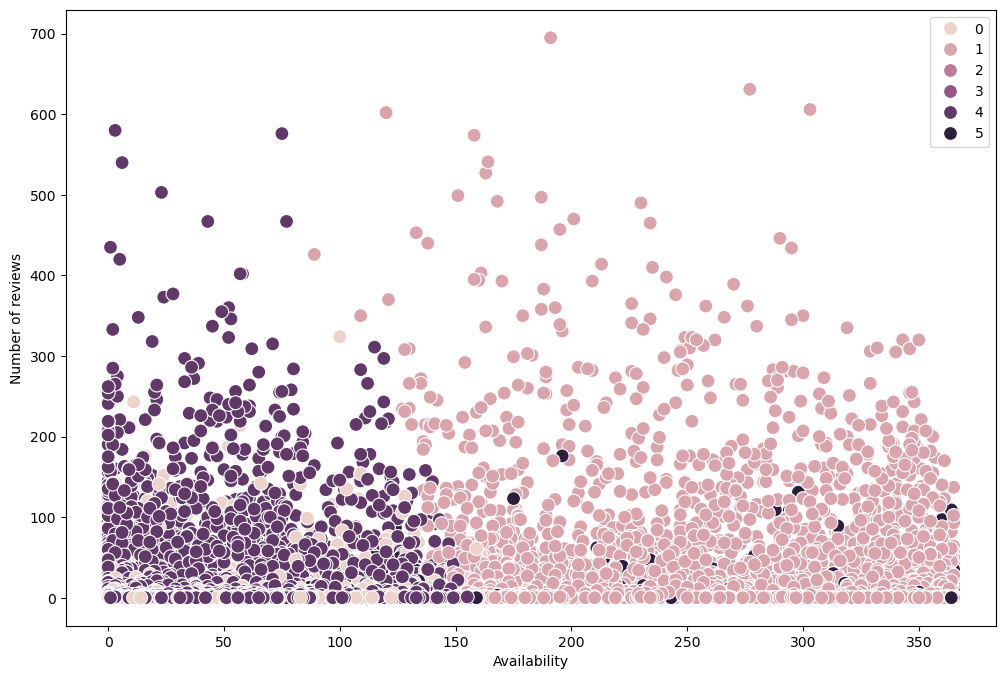

In [54]:
# Plot 6 clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['number_of_reviews'], hue=kmeans_exp.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Number of reviews')
plt.show()

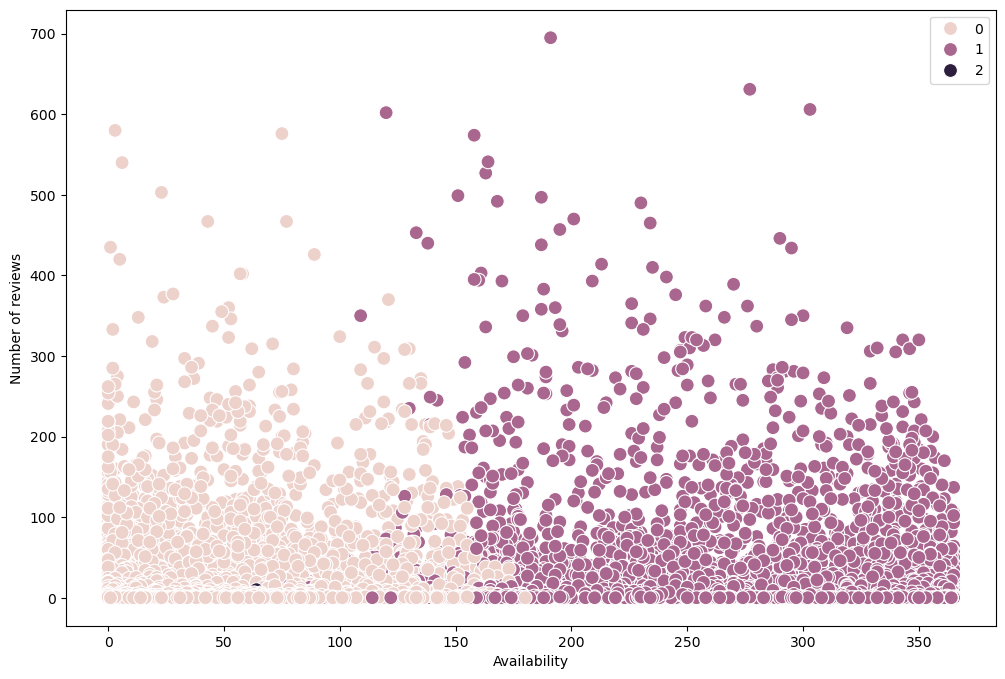

In [56]:
# Plot 3 clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['number_of_reviews'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Number of reviews')
plt.show()

In [58]:
df['clusters_exp'].value_counts()

clusters_exp
4    12474
0     4101
1     2995
5      448
3       10
2        2
Name: count, dtype: int64

In [60]:
df['clusters'].value_counts()

clusters
0    16664
1     3358
2        8
Name: count, dtype: int64

# 08. Descriptive statistics

In [63]:
df.groupby('clusters').agg({'price':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'minimum_nights':['mean', 'median']})

price         availability_365        number_of_reviews  \
                 mean  median             mean median              mean   
clusters                                                                  
0          138.844875   124.0        17.660286    0.0         16.675588   
1          206.490768   150.0       269.242406  285.0         45.841870   
2         5135.250000  4750.0       208.000000  255.0          4.625000   

                minimum_nights         
         median           mean median  
clusters                               
0           8.0       3.073992    2.0  
1          19.0       4.470816    2.0  
2           2.5      54.500000    3.0

In [65]:
df.groupby('clusters_exp').agg({'price':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'minimum_nights':['mean', 'median']})

price         availability_365        number_of_reviews  \
                     mean  median             mean median              mean   
clusters_exp                                                                  
0              230.270910   200.0        25.161912    3.0         13.097293   
1              148.502170   139.0       272.564942  285.0         51.621035   
2             8250.000000  8250.0       363.000000  363.0         10.500000   
3             3378.200000  3071.0       210.700000  232.0          1.600000   
4              108.716370   109.0        15.099968    0.0         17.409652   
5              564.004464   500.0       199.464286  182.0         14.138393   

                    minimum_nights         
             median           mean median  
clusters_exp                               
0               7.0       3.046818    2.0  
1              23.0       4.621703    2.0  
2              10.5      16.500000   16.5  
3               0.0      45.200000    4.5  
4               8.0       3.059804    2.0  
5               5.0       3.758929    3.0

# 09. Insights

I am now convinced that in the final data analysis I should remove the highest prices (definetely anything above 2000, and probably even 1000 per night) because they are extreeme outliers. This was very informative and I feel that I understand data much better now.